<a href="https://colab.research.google.com/github/pprajnadata/pprajnadata/blob/main/Traffic_adwords_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##--Traffic adwords dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load dataset
# Replace 'path/to/your/file.csv' with the actual path to your uploaded file in Colab
# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()  # Select your CSV here

# Step 2: Load the uploaded file
import io
# Get the actual filename from the uploaded dictionary
uploaded_filename = list(uploaded.keys())[0]
try:
    df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]), encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]), encoding='ISO-8859-1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]), encoding='cp1252')
        except UnicodeDecodeError:
            print("Could not decode the file with common encodings. Please check the file encoding.")

Saving Traffic_data_adwords_final_csv.csv to Traffic_data_adwords_final_csv (2).csv


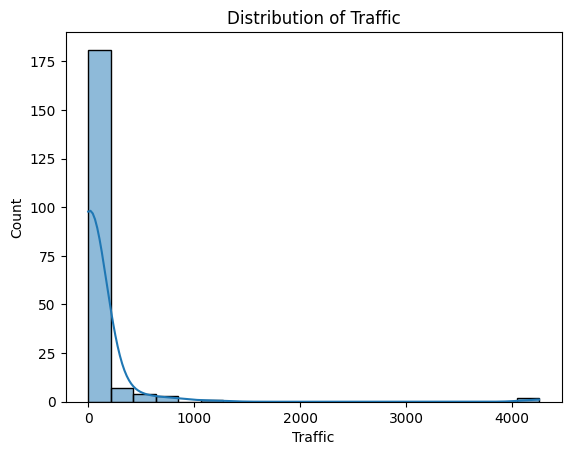

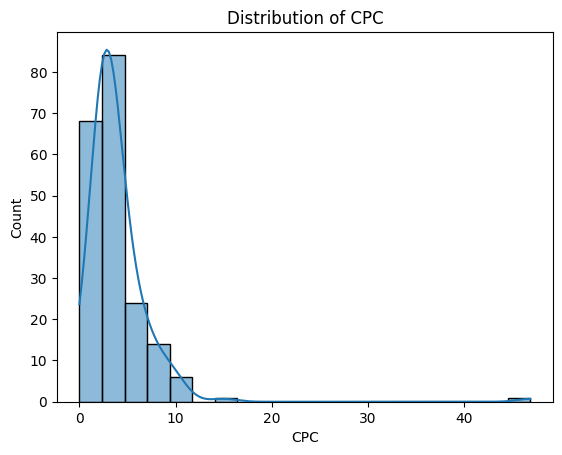

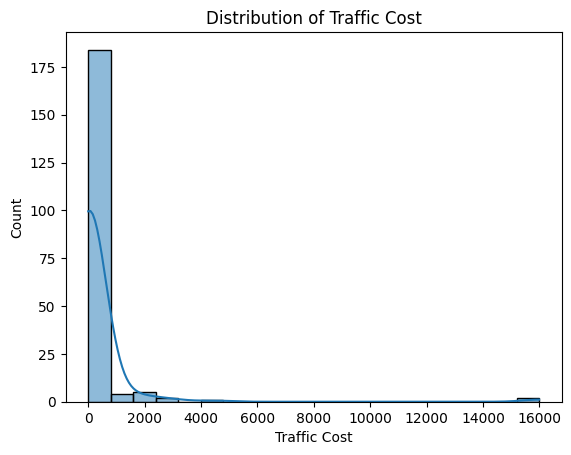

In [ ]:
# Distributions
for col in ['Traffic', 'CPC', 'Traffic Cost']:
    plt.figure()
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.show()

In [ ]:
# Prepare data
X = df[['Traffic', 'CPC', 'Traffic Cost']].values

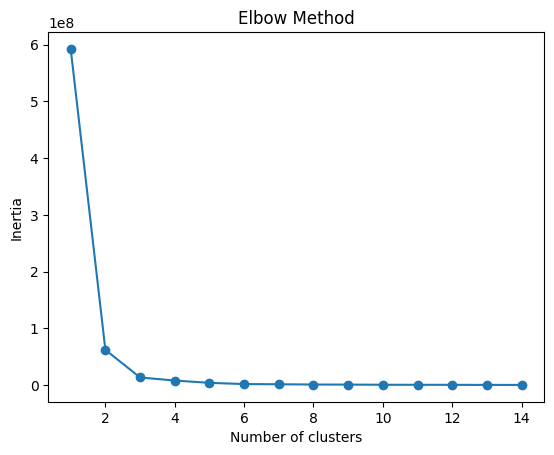

In [ ]:
# Elbow method
inertia = []
for n in range(1, 15):
    km = KMeans(n_clusters=n, random_state=111)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Fit KMeans (adjustig k as needed.here k =5 taken bcz not much of change happe after)
k = 5
model = KMeans(n_clusters=k, random_state=111)
model.fit(X)
df['Cluster'] = model.labels_

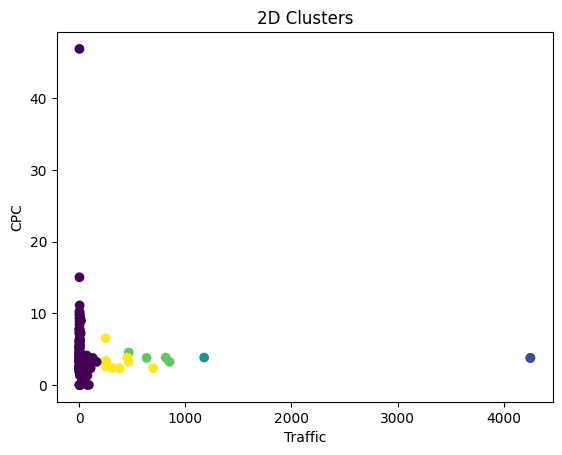

In [ ]:
# 2D Plot
plt.scatter(df['Traffic'], df['CPC'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Traffic')
plt.ylabel('CPC')
plt.title('2D Clusters')
plt.show()

In [ ]:
# 3D Plot
trace = go.Scatter3d(
    x=df['Traffic'], y=df['CPC'], z=df['Traffic Cost'],
    mode='markers',
    marker=dict(color=df['Cluster'], size=10, opacity=0.8),
    text=df['Keyword']  # Hover info
)
layout = go.Layout(scene=dict(xaxis_title='Traffic', yaxis_title='CPC', zaxis_title='Traffic Cost'))
fig = go.Figure([trace], layout)
py.offline.iplot(fig)

In [ ]:
# Save
df.to_csv('kmeansalgo_traffic_adwords.csv', index=False)

# New Section